In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
#Importing the Tree and Metrics Module
from sklearn import metrics

#Decision Tree Algorithm and plot_tree function
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Train-Test Split
from sklearn.model_selection import train_test_split

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Explore Dataset

In [3]:
df=pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\ad1.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,78.84,30,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,04/04/2016 03:57,1
1,60.23,35,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,06/18/2016 16:02,0
2,46.20,49,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,06/26/2016 07:01,1
3,87.85,31,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,04/18/2016 21:07,1
4,64.38,37,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,07/18/2016 18:33,0


In [4]:
df.shape

(999, 10)

In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,999.00,999.00,999.00,999.00,999.00
mean,63.19,36.54,53937.07,174.37,0.52
std,15.13,9.13,11065.89,42.04,0.50
min,32.60,20.00,20592.99,105.86,0.00
25%,48.73,30.00,47929.83,135.28,0.00
50%,66.01,35.00,55642.32,167.67,1.00
75%,75.84,42.00,62792.43,213.75,1.00
max,89.80,60.00,77460.07,251.08,1.00


In [6]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                       object
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [7]:
to_drop = ['City','Ad Topic Line','Timestamp']
df.drop(to_drop,axis=1,inplace=True)

In [8]:
cat_cols = ['Gender','Country']
df1 = pd.get_dummies(df,columns = cat_cols)

In [9]:
### Check for missing values
total = df1.isnull().sum().sort_values(ascending=False)
total

Daily Time Spent on Site                     0
Country_Panama                               0
Country_New Zealand                          0
Country_Nicaragua                            0
Country_Niger                                0
Country_Norfolk Island                       0
Country_Northern Mariana Islands             0
Country_Palau                                0
Country_Palestinian Territory                0
Country_Papua New Guinea                     0
Age                                          0
Country_Peru                                 0
Country_Philippines                          0
Country_Pitcairn Islands                     0
Country_Portugal                             0
Country_Puerto Rico                          0
Country_Qatar                                0
Country_Rwanda                               0
Country_Netherlands Antilles                 0
Country_Netherlands                          0
Country_Namibia                              0
Country_Mongo

### Pre-processing

In [11]:
x = df1.drop(["Clicked on Ad"], axis=1)
y = df1["Clicked on Ad"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((749, 151), (250, 151), (749,), (250,))

In [12]:
## Scale the dataset

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

#Train the model
clf.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25)

In [14]:
y_pred = clf.predict(x_test_scaled)

#Check the performance metrics
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

78.80%


In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       120
           1       0.85      0.72      0.78       130

    accuracy                           0.79       250
   macro avg       0.80      0.79      0.79       250
weighted avg       0.80      0.79      0.79       250




In [16]:
print("Confusion Matrix: \n%s" % metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
[[104  16]
 [ 37  93]]


In [17]:
#Encode Confusion Matrix into a DataFrame

#Set Labels
labels = list(y_test.unique())

#Get confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#Convert to DataFrame
cm_df = pd.DataFrame(cm,index=labels, columns=labels)

cm_df

,1,0
1,104,16
0,37,93


### Feature Importance

In [18]:
#Extract the feature importance
f_importance = clf.feature_importances_

#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

#Sort the values in Descending order (Most Important -> Least Important)
df_feature_importance.sort_values(["Importance"],ascending=False)


,Importance
Age,0.56
Daily Internet Usage,0.11
Daily Time Spent on Site,0.08
Area Income,0.06
Country_Barbados,0.04
Country_Northern Mariana Islands,0.03
Country_Lebanon,0.03
Country_Sao Tome and Principe,0.03
Country_Vanuatu,0.02
Country_Saint Martin,0.02


<AxesSubplot:>

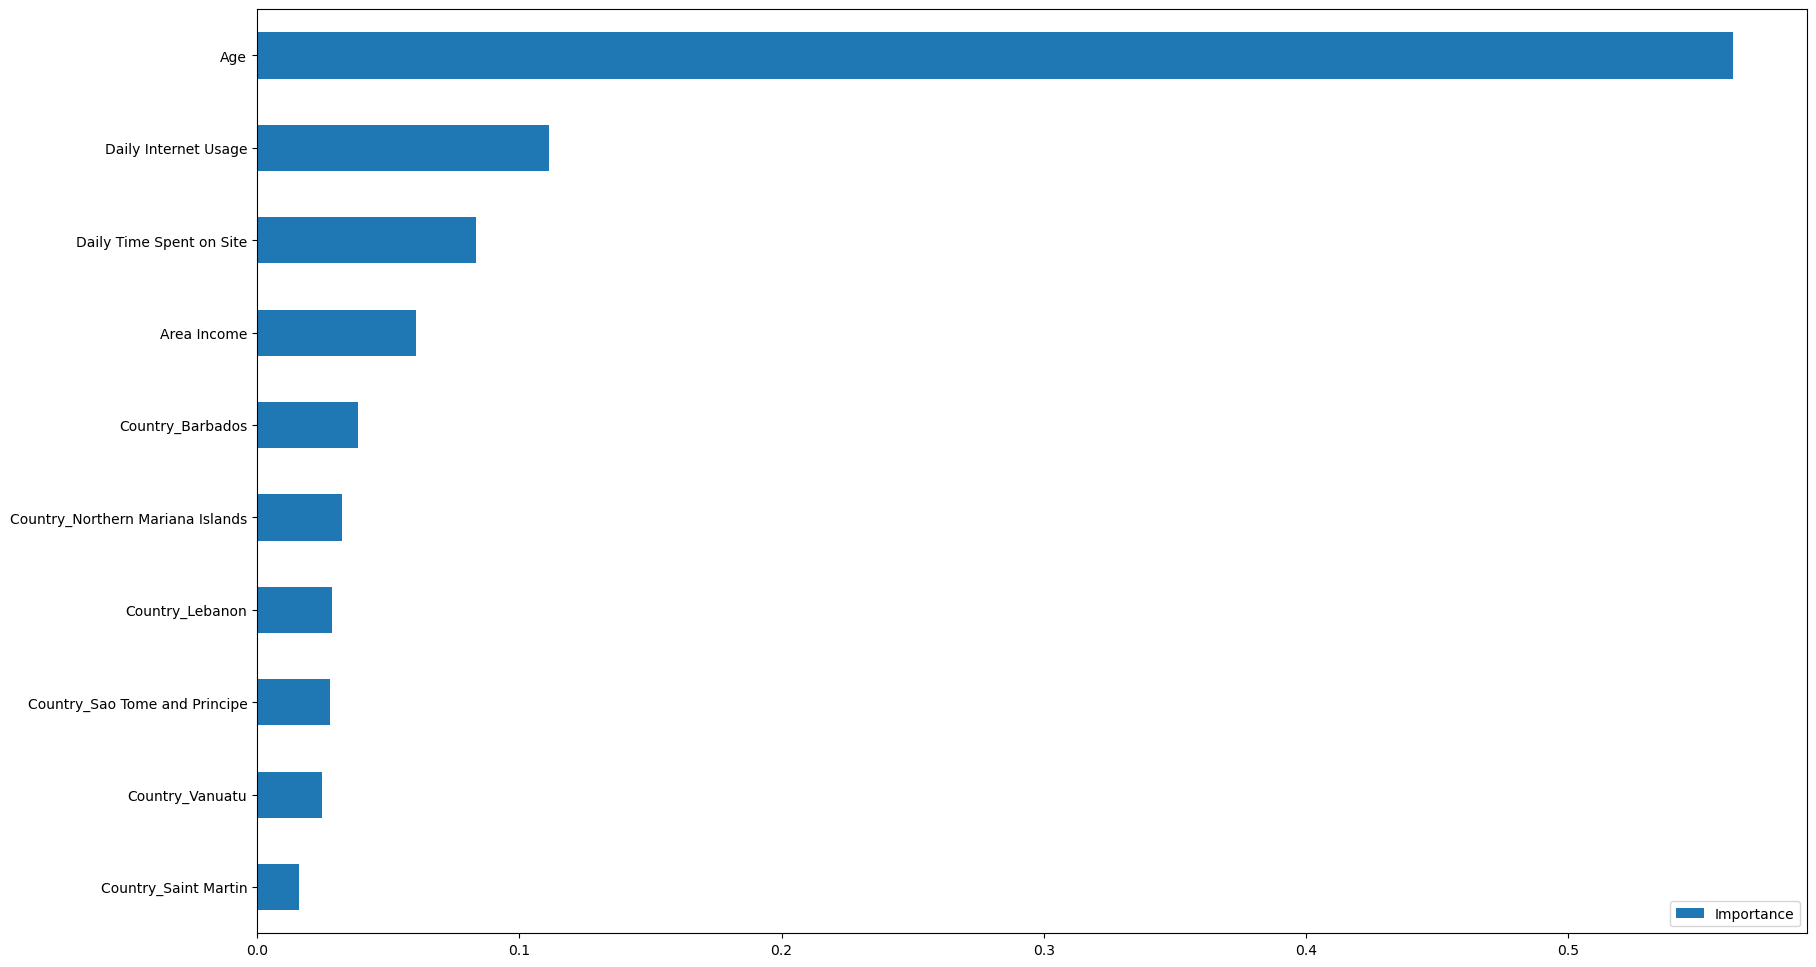

In [19]:
df_feature_importance_asc = df_feature_importance.sort_values(["Importance"], ascending = True)[-10:]

#Horizontal Bar Plot
df_feature_importance_asc.plot(kind='barh', figsize=(20,12))

In [20]:
feature_col = list(x_train.columns)

#Get classes
classes = clf.classes_

#Convert to String if number
classes = ["%s" % clas for clas in classes]

classes

['0', '1']

### Visualize Decision Tree

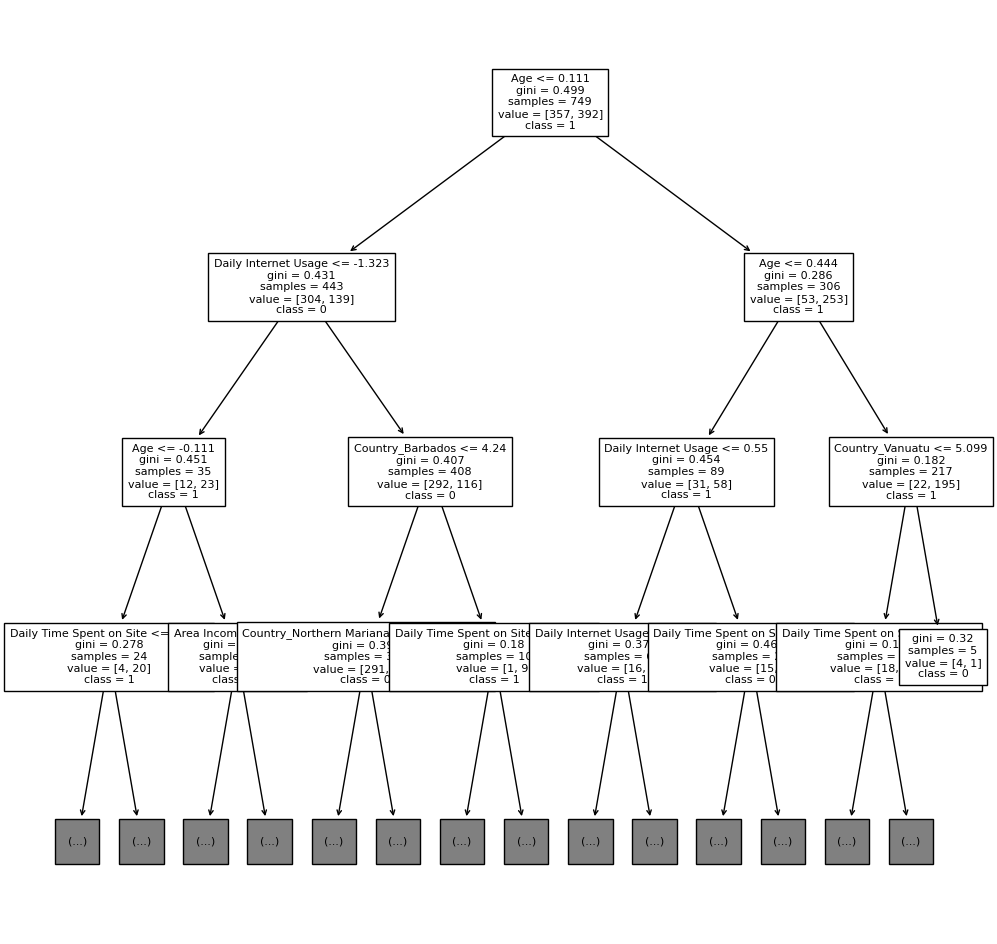

In [21]:
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))  

#Use the plot tree function
plot_tree(clf, class_names=classes, feature_names=feature_col, fontsize=8, max_depth=3)

#Show the Plot
plt.show()

### Cross Validation

In [22]:
#Import the Cross Validation Score function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [23]:
# Create a pipeline to add scaling to the original dataframe 
#(we want to scale based on the train partitions on every fold)

from sklearn.pipeline import make_pipeline

clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)

model = make_pipeline(StandardScaler(), clf)

cv_results = cross_val_score(model, x_train, y_train, cv=5)

print(cv_results)

[0.69333333 0.76666667 0.77333333 0.72       0.7114094 ]


In [24]:
#Get the Mean to get the average accuracy 
print("Accuracy: {:.2%}".format(np.mean(cv_results)))

Accuracy: 73.29%


In [25]:
cv_results = cross_validate(model, x_train, y_train,  scoring = ['accuracy', 'f1_weighted','roc_auc'], cv=5)
print (cv_results)

{'fit_time': array([0.01806808, 0.02200127, 0.03099942, 0.01311183, 0.01562595]), 'score_time': array([0.01092696, 0.01700878, 0.01200318, 0.01569319, 0.        ]), 'test_accuracy': array([0.69333333, 0.76666667, 0.77333333, 0.72      , 0.7114094 ]), 'test_f1_weighted': array([0.6894835 , 0.76671858, 0.77333333, 0.72014936, 0.71101766]), 'test_roc_auc': array([0.78703704, 0.82318376, 0.82724193, 0.79684436, 0.75469484])}


In [26]:
df_scores = pd.DataFrame(cv_results)

print (df_scores)
print('Averages \nAccuracy: {:2%}, f1: {:2%}, roc_auc: {:2%}'.format(np.mean(df_scores.test_accuracy),np.mean(df_scores.test_f1_weighted),np.mean(df_scores.test_roc_auc)))

   fit_time  score_time  test_accuracy  test_f1_weighted  test_roc_auc
0      0.02        0.01           0.69              0.69          0.79
1      0.02        0.02           0.77              0.77          0.82
2      0.03        0.01           0.77              0.77          0.83
3      0.01        0.02           0.72              0.72          0.80
4      0.02        0.00           0.71              0.71          0.75
Averages 
Accuracy: 73.294855%, f1: 73.214049%, roc_auc: 79.780038%


In [27]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=20, random_state=25)
model = make_pipeline(StandardScaler(), clf )


cv_results = cross_validate(model, x_train, y_train,  scoring = ['accuracy', 'f1_weighted','roc_auc'], cv=5)
df_scores = pd.DataFrame(cv_results)
df_scores
print (df_scores)
print('Averages \nAccuracy: {:2%}, f1: {:2%}, roc_auc: {:2%}'.format(np.mean(df_scores.test_accuracy),np.mean(df_scores.test_f1_weighted),np.mean(df_scores.test_roc_auc)))

   fit_time  score_time  test_accuracy  test_f1_weighted  test_roc_auc
0      0.02        0.01           0.74              0.74          0.74
1      0.02        0.02           0.75              0.75          0.73
2      0.03        0.01           0.79              0.79          0.79
3      0.02        0.01           0.75              0.75          0.75
4      0.02        0.01           0.78              0.78          0.78
Averages 
Accuracy: 76.237136%, f1: 76.205710%, roc_auc: 75.718670%


### Build a Model - Best Parameter

In [28]:
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=25)
model = make_pipeline(StandardScaler(), clf )

clf.fit(x_train_scaled, y_train)

y_pred = clf.predict(x_test_scaled)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=25):
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       120
           1       0.85      0.72      0.78       130

    accuracy                           0.79       250
   macro avg       0.80      0.79      0.79       250
weighted avg       0.80      0.79      0.79       250


